# Titanic Project

This project is a project from Kaggle platform. The aim of this challenge is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. 

### Table of contents

1) Import Libraries <br>
2) Read In and Explore the Data <br>
3) Data Analysis <br>
4) Data Visualization <br>
5) Cleaning Data <br>
6) Choosing Model <br>

### 1) Import libraries

In [145]:
#First, let's start by importing the nesessary data analysis libraries
import numpy as np
import pandas as pd

### 2) Explore the data

In [146]:
#Let's have a quick overlook of the data
train_data = pd.read_csv("titanic_train.csv")
train_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sutehall, Mr. Henry Jr",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 3) Data analysis

Observations:
- We have a total of 891 passengers in the dataset
- "Age" & "Cabin" columns are missing a lot of values. <br>
- Since "Age" could be a significant factor in survival, We will try to fill in the missing values.<br>
- "Cabin" column however is missing so much data, it will probably be wiser to drop that value out completely.<br>
- "Embarked" column is missing 2 values, which we will also fill in.

In [147]:
#We can display the missing values more clearly by using the following command:
print(pd.isnull(train_data).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [148]:
#Let's open the train data and have a look at the first five rows.
#Now we also see what kind of values the rows actually contains.
train_data = pd.read_csv("titanic_train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
#Let's open the test data and have a look at the first five rows
#We can see that the test data contains exactly the same columns except for the "Survived" column.
test_data = pd.read_csv("titanic_test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Columns
Let's have a look at the columns next

In [150]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Each column represents data about the individual passangers:

PassengerId: the ID number given for each passenger in this dataset.<br>
Survived: 0 if they died, 1 if they survived.<br>
Pclass: whether they were in 1st, 2nd or 3rd class.<br>
Name: full name including title and sometimes maiden name.<br>
Sex: male or female<br>
Age: in years<br>
Sibsp: number of siblings and/or spouses aboard on the Titanic<br>
Parch: number of parents and/or children aboard on the Titanic<br>
Ticket: the ticket number<br>
Fare: how much they paid for their ticket<br>
Cabin: the cabin number<br>
Embarked: which port they embarked from. C = Cherbourg, Q = Queenstown, S = Southampton.<br>

### 4) Data visualization
A great way to understand the data better and find some patterns is to plot various information.<br>
We will start with something easy, like gender and see if there is a difference between men and women surviving.

In [151]:
#For this we need to import some data visailization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


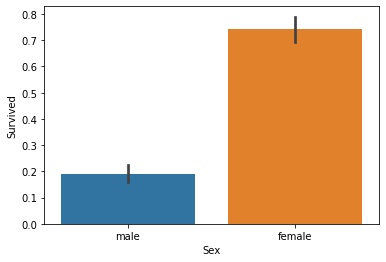

In [152]:
#Let's draw a barplot of survival by gender
sns.barplot(x="Sex", y="Survived", data=train_data)

#Print percentages of females vs. males that survive
print("Percentage of females who survived:", train_data["Survived"][train_data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train_data["Survived"][train_data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

### Observations
In this result we see clearly the principle of "women and children first", as 74% of women survived and only nearly 19% of men.<br> Now let's plot Cabin class.

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


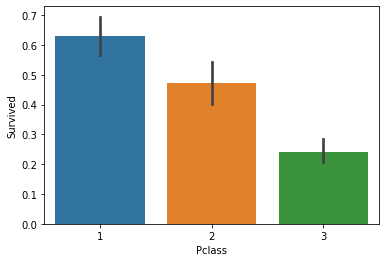

In [153]:
#Let's draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train_data)

#Print percentage of passangers by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train_data["Survived"][train_data["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train_data["Survived"][train_data["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train_data["Survived"][train_data["Pclass"] == 3].value_counts(normalize = True)[1]*100)

### Observations
Passangers who were in 1st class had the best chance of survival. Almost three times better than passangers who were in 3rd class. <br> Next, let's have a look at SibSp.

Percentage of SibSP = 0 that survived: 34.53947368421053
Percentage of SibSP = 1 that survived: 53.588516746411486
Percentage of SibSP = 2 that survived: 46.42857142857143
Percentage of SibSP = 3 that survived: 25.0
Percentage of SibSP = 4 that survived: 16.666666666666664


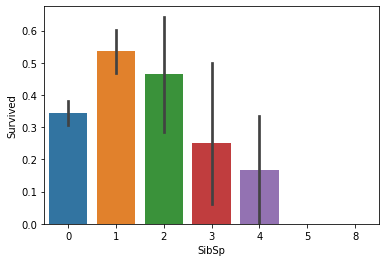

In [154]:
#Let's draw a bar plot of survival by how many siblings or spouse the passanger had on board
sns.barplot(x="SibSp", y= "Survived", data=train_data)

#Print percentage of passangers by SibSP that survived
print("Percentage of SibSP = 0 that survived:", train_data["Survived"][train_data["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSP = 1 that survived:", train_data["Survived"][train_data["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSP = 2 that survived:", train_data["Survived"][train_data["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of SibSP = 3 that survived:", train_data["Survived"][train_data["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of SibSP = 4 that survived:", train_data["Survived"][train_data["SibSp"] == 4].value_counts(normalize = True)[1]*100)

### Observations
We can see that passangers who had 1-2 children and/or spouse aboard had better chance of survival.

Percentage of Parch = 0 that survived: 34.365781710914455
Percentage of Parch = 1 that survived: 55.08474576271186
Percentage of Parch = 2 that survived: 50.0
Percentage of Parch = 3 that survived: 60.0
Percentage of Parch = 5 that survived: 20.0


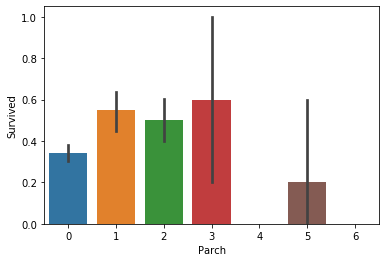

In [155]:
#Let's plot next 'Parch', which is the amount of parents/children on board
sns.barplot(x="Parch", y= "Survived", data=train_data)

#Print percentage of passengers by Parch that survived
print("Percentage of Parch = 0 that survived:", train_data["Survived"][train_data["Parch"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of Parch = 1 that survived:", train_data["Survived"][train_data["Parch"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Parch = 2 that survived:", train_data["Survived"][train_data["Parch"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Parch = 3 that survived:", train_data["Survived"][train_data["Parch"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of Parch = 5 that survived:", train_data["Survived"][train_data["Parch"] == 5].value_counts(normalize = True)[1]*100)

### Observations
The biggest chance of surviving was with passengers who had 1-3 children and/or parents on board.

## 5) Cleaning data

It is always a good idea to only use the relevant info in our predictions. By dropping features we are dealing with fewer data points which will speed up the notebook and eases up the analysis. Therefore, let's drop some columns that we think have no significant value. 

In [156]:
#Let's start off by dropping the Cabin feature since there are so many missing values.
train_data = train_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Cabin'], axis = 1)

In [157]:
#Let's also drop the Ticket feature since it's unlikely to yield any useful information
train_data = train_data.drop(['Ticket'], axis = 1)
test_data = test_data.drop(['Ticket'], axis = 1)

In [158]:
#Let's also drop the Fare feature since we don't think it is useful information.
train_data = train_data.drop(['Fare'], axis = 1)
test_data = test_data.drop(['Fare'], axis = 1)

In [159]:
#Now let's fill in the missing values for the 'Embarked' column
#We start by looking at how many passengers embarked from which harbour
print("Amount of passengers embarking in Southampton (S):")
southampton = train_data[train_data["Embarked"] == "S"].shape[0]
print(southampton)

print("Amount of passengers embarking in Cherbourg (C):")
cherbourg = train_data[train_data["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Amount of passengers embarking in Queenstown (Q):")
queenstown = train_data[train_data["Embarked"] == "Q"].shape[0]
print(queenstown)

Amount of passengers embarking in Southampton (S):
644
Amount of passengers embarking in Cherbourg (C):
168
Amount of passengers embarking in Queenstown (Q):
77


### Observations
We see that most of the passangers embarked in Southampton. Therefore, the biggest probability is that the missing values are also Southampton.

In [160]:
#Let's go ahead and replace the missing values with Southampton.
#The "fillna" method is used to fill NaN values from our data frame. 
train = train_data.fillna({"Embarked": "S"}, inplace=True)

### Name/Title
Next let's have a look at the 'Name' column. In the following code we extract the "Title" feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within "Name" feature. The expand=False flag returns a DataFrame.

In [161]:
#Let's first create a combined group of both datasets
combine = [train_data, test_data]

#Then we extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [162]:
#Let's replace various titles with more common names and classify some special titles as "Other"
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Other')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.250000
5,Royal,1.000000


In [163]:
#Let's map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Other": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,1


In [164]:
#Now let's drop the name feature since it contains no more useful information.
train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

### Age 

In [165]:
#Let's fill in the missing Age value with the average age 
age_avg = train_data['Age'].mean()
age_std = train_data['Age'].std()

train_data['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std), inplace=True)

### Converting categorical features

Let's continue converting features which contain strings to numerical values. <br>
Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [166]:
#Let's map each Sex value to a numerical value
sex_mapping = {"female": 1, "male": 0}
train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,0,22.0,1,0,S,1
1,2,1,1,1,38.0,1,0,C,3
2,3,1,3,1,26.0,0,0,S,2
3,4,1,1,1,35.0,1,0,S,3
4,5,0,3,0,35.0,0,0,S,1


In [167]:
#Let's map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,0,22.0,1,0,1,1
1,2,1,1,1,38.0,1,0,2,3
2,3,1,3,1,26.0,0,0,1,2
3,4,1,1,1,35.0,1,0,1,3
4,5,0,3,0,35.0,0,0,1,1


In [168]:
#Age is more tricky to transform, since there are so many different ages. 
#Therefore we need to form some groups to do it easier. 

train_data["Age"] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels = labels)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels = labels)

#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping)
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,1,0,3,0,22.0,1,0,1,1,4.0
1,2,1,1,1,38.0,1,0,2,3,6.0
2,3,1,3,1,26.0,0,0,1,2,5.0
3,4,1,1,1,35.0,1,0,1,3,5.0
4,5,0,3,0,35.0,0,0,1,1,5.0


In [169]:
#Now we can drop the "Age" feature 
train_data = train_data.drop(['Age'], axis = 1)
test_data = test_data.drop(['Age'], axis = 1)

In [170]:
#Now we can see that we no longer have any missing values in the dataframe:
print(pd.isnull(train_data).sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
Title          0
AgeGroup       0
dtype: int64


In [171]:
#Let's have look at out train data one more time to check that we have converted all features to binary data.
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup
0,1,0,3,0,1,0,1,1,4.0
1,2,1,1,1,1,0,2,3,6.0
2,3,1,3,1,0,0,1,2,5.0
3,4,1,1,1,1,0,1,3,5.0
4,5,0,3,0,0,0,1,1,5.0


### 6) Choosing the Model 
Now let's try out a few different models and see how we score in accuracy. 

#### Splitting the Training Data
We will use part of our training data (20% in this case) to test the accuracy of our different models.

In [172]:
#Let's import nesessary libraries
from sklearn.model_selection import train_test_split

predictors = train_data.drop(['Survived', 'PassengerId'], axis=1)
target = train_data["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

### Gradient Boosting Classifier

In [173]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

82.68


### Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

77.09


### Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

79.89


We can see that the highest accuracy score was from Gradient Boosting Classifier.<br>
However, I was unsuccessful with creating a submission file with that one. Let's go with second best, random forest instead.

In [177]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
submission = output.to_csv('my_submission.csv', index=False)

#This will write out the CSV when you go back to your Jupyter home. 